#ML4Net - Lab 2

## Team members

Albert Jané Lardiés 268537 | Marc Mallol Canelada 268923 | Jordi Esteve Claramunt 268829

## Description

In this lab, you will implement an ML model that detects congestion in Wi-Fi networks. In particular, you will desing and implement a supervised learning model (e.g., linear regression, multi-layer perceptron, neural network), which you will train using a dataset that was generated using the ns-3 simulator.

Each row in the dataset is organized as (x1, x2, ..., x26, y1, y2, ..., y26, s, r, l), where:

* `x1, x2..., x26, y1, y2, ..., y26` represent the histogram of the Inter-Frame Space (IFS) values for M frames that accessed the medium in a 60 seconds observation sample.
  * `x26` represents the maximum IFS duration (in ms) in the considered M frames whereas `x1` is `x26`/26
  * The remaining `xi` values are buckets at uniform spacing between `x1` and `x26`.
  * For i>1, the values of `yi` represent the IFS histogram count (in percentage) for a corresponding bucket interval between `xi`-1 and `xi`.
  * In the case of `y1`, the bucket interval is between 0 and `x1`
* `s` is the average IFS duration (in ms)
* `r` is the percentage of frame collisions
* `l` is the label, where 1 indicates that the network is saturated, and 0, that it is not

Original dataset: https://ieee-dataport.org/documents/dataset-identification-saturated-and-unsaturated-wi-fi-networks

## Instructions

*   Follow the steps from this Notebook and complete the proposed exercises.
*   Deliver the completed Notebook by uploading it to your Github repository.
*   Submission deadline: 1 June 2025 (EoB).

## Setting up the environment

> **Author's Note:**  
> The notebook is still being changed... Soon it will be able to be corrected

> **Author's Note:**  
> Following the approach we used in our previous lab, we have decided to run this notebook locally with a connected GitHub repository.  
> We find this workflow more comfortable and efficient, especially when we need to make edits collaboratively.  
>
> As a result, the following code cells include a setup that differs from the one provided in the original Lab 2 template.


In [110]:
# ┌──────────────────────────────────────────────────────────────────┐
# │              Notebook Setup Cell for Lab2 (All-in-One)         │
# └──────────────────────────────────────────────────────────────────┘

import os
import zipfile
import requests

# Get the directory where the notebook or script is located
notebook_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()

# Define path to store dataset
mypath = os.path.join(notebook_dir, "dataset_Lab2")
zip_filename = "dataset_Lab2.zip"
zip_filepath = os.path.join(notebook_dir, zip_filename)

# Dataset URL
dataset_url = "https://github.com/fwilhelmi/fwilhelmi.github.io/raw/refs/heads/master/files/dataset_Lab2.zip"

# Step 1: Create the dataset directory
os.makedirs(mypath, exist_ok=True)

# Step 2: Download the dataset zip if it doesn't already exist
if not os.path.exists(zip_filepath):
    print("Downloading dataset...")
    response = requests.get(dataset_url)
    with open(zip_filepath, "wb") as f:
        f.write(response.content)
    print("Download complete.")
else:
    print("Dataset zip already exists.")

# Step 3: Unzip the dataset (only if not already extracted)
if not any(fname.endswith(".py") or fname.endswith(".ipynb") for fname in os.listdir(mypath)):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
        zip_ref.extractall(mypath)
    print("Extraction complete.")
else:
    print("Dataset already extracted.")

# Optional: Remove the zip file
os.remove(zip_filepath)

print(f"Setup complete. Files are in: {mypath}")


Download complete.
Extracting dataset...
Extraction complete.
Setup complete. Files are in: c:\Users\alber\Documents\GitHub\ML4Net-2025\Lab2\dataset_Lab2


## Visualizing the data




       0       1       2       3       4       5       6       7       8   \
0  0.0065  0.0130  0.0195  0.0260  0.0325  0.0390  0.0455  0.0520  0.0585   
1  0.0263  0.0526  0.0789  0.1052  0.1316  0.1579  0.1842  0.2105  0.2368   
2  0.0176  0.0352  0.0528  0.0704  0.0881  0.1057  0.1233  0.1409  0.1585   
3  0.0222  0.0444  0.0666  0.0888  0.1110  0.1332  0.1554  0.1776  0.1998   
4  0.0189  0.0379  0.0568  0.0758  0.0947  0.1137  0.1326  0.1516  0.1705   

       9   ...      45      46      47      48      49      50      51  \
0  0.0650  ...  0.0316  0.0368  0.0312  0.0000  0.0316  0.0364  0.0304   
1  0.2631  ...  0.0316  0.0368  0.0312  0.0000  0.0316  0.0364  0.0304   
2  0.1761  ...  0.0316  0.0368  0.0312  0.0312  0.0316  0.0299  0.0304   
3  0.2220  ...  0.0316  0.0307  0.0312  0.0000  0.0360  0.0364  0.0304   
4  0.1895  ...  0.0316  0.0368  0.0312  0.0000  0.0316  0.0364  0.0304   

       52      53  54  
0  0.0604  0.9960   1  
1  0.0604  0.9960   1  
2  0.0604  0.9957   

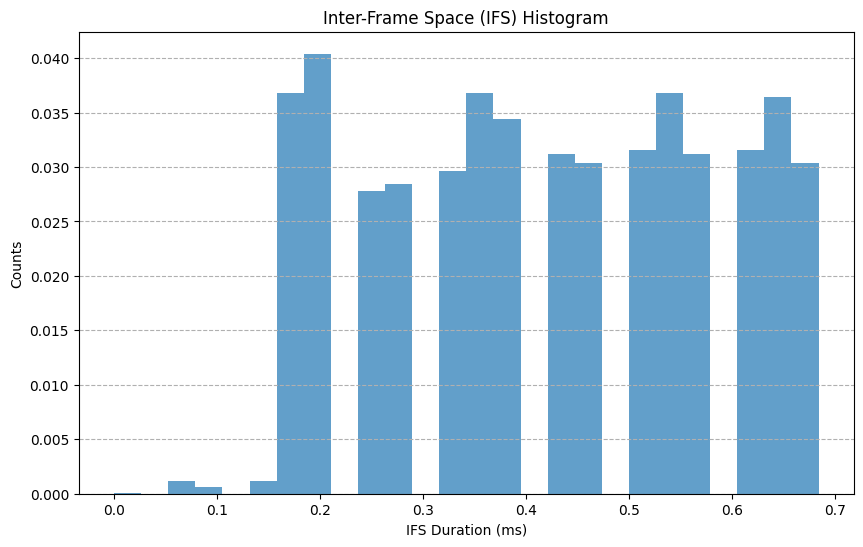

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_ifs_histogram(data_row):
    """
    Plots the Inter-Frame Space (IFS) histogram from a single row of the dataset.

    Args:
        data_row (list or numpy.ndarray): A list or array representing a single row
                                          in the format (x1, ..., x26, y1, ..., y26, s, r, l).
    """

    # Get IFS values and the corresponding counts
    x_values = np.array(data_row[:26])
    y_counts = np.array(data_row[26:52])

    # Calculate the bin edges based on x_values
    bin_edges = [0] + list(x_values)

    # Create the histogram plot
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], y_counts, width=np.diff(bin_edges)[0], align='edge', alpha=0.7)

    # Add labels and title
    plt.xlabel("IFS Duration (ms)")
    plt.ylabel("Counts")
    plt.title("Inter-Frame Space (IFS) Histogram")
    plt.grid(axis='y', linestyle='--')

    # Show the plot
    plt.show()

# Example usage

# -> Read the data file
file_name = mypath + '/train_data.csv'
train_data_df = pd.read_csv(file_name, header=None)
print(train_data_df.head())

# -> Get a sample from the dataset and plot it
row_index = 1
sample_data = train_data_df.iloc[row_index].values
plot_ifs_histogram(sample_data)

## EXERCISES

### Exercise 1:
Define an approach for training and validating the model you are going to train with the proposed data. Then, perform the split accordingly.

### Response


Since this is a **supervised binary classification** task (`l ∈ {0, 1}`), we start by loading the `train_data.csv` and `test_data.csv` datasets.

Even though a test set is already provided, we will **further split the training dataset** into:
- A **training subset** (80%)
- A **validation subset** (20%)

This allows us to evaluate model generalization during development and hyperparameter tuning.

We will perform a **stratified split** to preserve the proportion of saturated (`l=1`) and non-saturated (`l=0`) classes across both subsets.  
This is important in binary classification tasks where class imbalance may bias the model.

The **test set will remain untouched** until the final evaluation in Exercise 6.





In [112]:
# (response to exercise 1)
import pandas as pd
from sklearn.model_selection import train_test_split

# Generate the column names
x_cols = [f'x{i+1}' for i in range(26)]
y_cols = [f'y{i+1}' for i in range(26)]
other_cols = ['s', 'r', 'l']
all_cols = x_cols + y_cols + other_cols

# Load the CSVs with custom column names
train_df = pd.read_csv("dataset_Lab2/train_data.csv", header=None, names=all_cols)
test_df = pd.read_csv("dataset_Lab2/test_data.csv", header=None, names=all_cols)

# Separate features and label
X = train_df.drop(columns=['l'])
y = train_df['l']

# Split into train and validation (80% train / 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train set size: {X_train.shape}, Validation set size: {X_val.shape}")
print("Training class distribution:")
print(y_train.value_counts(normalize=True))
print("Validation class distribution:")
print(y_val.value_counts(normalize=True))



Train set size: (16000, 54), Validation set size: (4000, 54)
Training class distribution:
l
0    0.500062
1    0.499937
Name: proportion, dtype: float64
Validation class distribution:
l
1    0.5
0    0.5
Name: proportion, dtype: float64


### Exercise 2:

Define your ML model, so that it can be called for training and test. Examples of approaches that you could use (but not limited to):

*   Logistic Regression
*   K-Nearest Neighbors (KNN)
*   Decision Trees or Random Forests
*   Convolutional Neural Network (CNN)

### Response


### ✅ Model Selection and Justification

Given the characteristics of the problem:

- This is a **binary classification** task (`l ∈ {0, 1}`)
- The dataset is **tabular** and of moderate size
- Later exercises (e.g., Exercise 4) explicitly require us to **track the evolution of training and validation loss over time**

We choose to implement a **Multi-Layer Perceptron (MLP)** using **PyTorch**.

This model is appropriate because:

- It can **model non-linear decision boundaries**, unlike simpler models such as logistic regression
- It gives us full **control over the training process**, which allows us to manually track and visualize training/validation losses epoch-by-epoch
- It is lightweight and efficient enough to train on small-to-medium datasets without overfitting (when regularized properly)

---

### 🧱 Model Architecture

The selected architecture is a simple feedforward neural network with:

- **Input layer:** Matches the number of input features (54 in our case)
- **Hidden layers:** Two fully connected layers with ReLU activations
- **Output layer:** A single neuron with sigmoid activation, producing a probability in [0, 1]




In [92]:
pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [113]:

import torch
import torch.nn as nn
import torch.nn.functional as F

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define the MLP model
class MLPClassifier(nn.Module):
    def __init__(self, input_dim):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)  # Binary classification

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.output(x))  # Probabilities in [0, 1]
        return x

# Instantiate model
input_dim = X_train.shape[1]  # 54 features
model = MLPClassifier(input_dim).to(device)
print(model)


Using device: cpu
MLPClassifier(
  (fc1): Linear(in_features=54, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=1, bias=True)
)


### Exercise 3:

Define the hyperparameters that you will use to train the model.

### Response

In this exercise, we define the setup for training a neural network model. This involves specifying the hyperparameters: loss function, optimizer, learning rate, batch size, and number of training epochs.

So, the approach that we have taken in here is to define the mentioned hyperparameters, and we also add the values that we have given to them. We know that these values need to be tuned  empiricaly. That's why in here we'll just give the values, and later we will give more details on why did we chose them, when the actual model training is conducted (in **Exercise 4**).

- **Optimizer**: Adam
- **Loss function**: Binary Cross Entropy (`nn.BCELoss`)
- **Batch size**: `32`
- **Epochs**: `200`
- **Learning rate**: `0.001` 

✅ The results from **Exercise 4** indicated that a **learning rate of `0.001`** provided the best performance after 200 training epochs.






### Exercise 4:
Train the model and show the procedure (e.g., evolution of the training/validation loss).



In this exercise, we will train our Multi-Layer Perceptron (MLP) and track both **training** and **validation loss** across epochs. The goal is to analyze how well the model learns over time and how effectively it generalizes to unseen data.

We'll experiment with different **learning rates** and **epoch counts**, observing their impact on model performance. This helps us identify signs of **overfitting** or **underfitting**, and ultimately select optimal training hyperparameters.






In [114]:
def train_and_plot_for_config(lr_value=0.001, num_epochs=200, batch_size=32, label=None):
    print(f"\n🚀 Training with learning rate = {lr_value}, epochs = {num_epochs}, batch size = {batch_size}")
    print("-" * 60)

    # Prepare DataLoader with given batch size
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Reinitialize model, optimizer, and loss
    model = MLPClassifier(X_train.shape[1])
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr_value)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0

        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * inputs.size(0)

        train_loss = running_train_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor).item()
            val_losses.append(val_loss)

        # Print epoch info
        print(f"Epoch {epoch+1}/{num_epochs} — Train Loss: {train_loss:.4f} — Val Loss: {val_loss:.4f}")

    return train_losses, val_losses




In [96]:
def plot_loss_curves(train1, val1, train2, val2, label1, label2):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10,6))
    plt.plot(train1, label=f'{label1} - Train')
    plt.plot(val1, label=f'{label1} - Val')
    plt.plot(train2, label=f'{label2} - Train', linestyle='--')
    plt.plot(val2, label=f'{label2} - Val', linestyle='--')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss for Different Learning Rates")
    plt.legend()
    plt.grid(True)
    plt.show()



🚀 Training with learning rate = 0.001, epochs = 200, batch size = 32
------------------------------------------------------------


Epoch 1/200 — Train Loss: 0.2122 — Val Loss: 0.1425
Epoch 2/200 — Train Loss: 0.1085 — Val Loss: 0.1040
Epoch 3/200 — Train Loss: 0.0935 — Val Loss: 0.0892
Epoch 4/200 — Train Loss: 0.0802 — Val Loss: 0.1005
Epoch 5/200 — Train Loss: 0.0750 — Val Loss: 0.0879
Epoch 6/200 — Train Loss: 0.0688 — Val Loss: 0.0756
Epoch 7/200 — Train Loss: 0.0700 — Val Loss: 0.0721
Epoch 8/200 — Train Loss: 0.0636 — Val Loss: 0.0760
Epoch 9/200 — Train Loss: 0.0646 — Val Loss: 0.0639
Epoch 10/200 — Train Loss: 0.0598 — Val Loss: 0.0656
Epoch 11/200 — Train Loss: 0.0604 — Val Loss: 0.0654
Epoch 12/200 — Train Loss: 0.0589 — Val Loss: 0.0654
Epoch 13/200 — Train Loss: 0.0575 — Val Loss: 0.0587
Epoch 14/200 — Train Loss: 0.0582 — Val Loss: 0.0609
Epoch 15/200 — Train Loss: 0.0589 — Val Loss: 0.0689
Epoch 16/200 — Train Loss: 0.0580 — Val Loss: 0.0660
Epoch 17/200 — Train Loss: 0.0558 — Val Loss: 0.0868
Epoch 18/200 — Train Loss: 0.0546 — Val Loss: 0.0685
Epoch 19/200 — Train Loss: 0.0549 — Val Loss: 0.0624
Ep

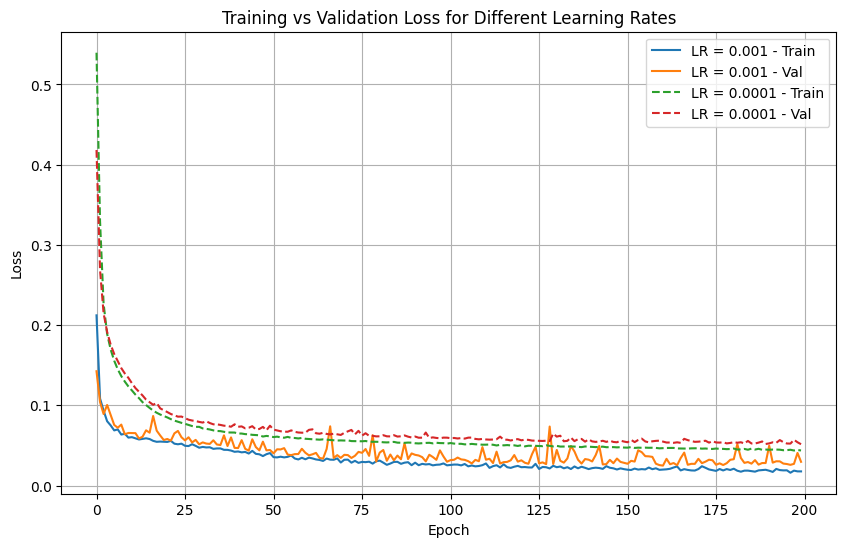

In [97]:
# Run training for two learning rates
train1, val1 = train_and_plot_for_config(lr_value=0.001, num_epochs=200, batch_size=32, label="lr=0.001")
train2, val2 = train_and_plot_for_config(lr_value=0.0001, num_epochs=200, batch_size=32, label="lr=0.0001")

# Plot the loss curves
plot_loss_curves(train1, val1, train2, val2, label1="LR = 0.001", label2="LR = 0.0001")


### 🔧 Hyperparameter Selection and Training Behavior Analysis

To refine our hyperparameter choices, we trained our MLP model for **200 epochs** using two learning rates: `0.001` and `0.0001`. We analyzed both training and validation losses to guide our selection.

#### 📉 Training Results Summary

For **learning rate = 0.001**, which showed the best overall performance:

- After 100 epochs:
  - **Train Loss**: 0.0251
  - **Val Loss**: 0.0325
- After 200 epochs:
  - **Train Loss**: 0.0178
  - **Val Loss**: 0.0273

This confirms that training beyond 100 epochs does bring marginal improvements, particularly in reducing both training and validation loss. However, the **rate of improvement decreases** after about 100–120 epochs.

#### 🧠 Learning Rate Comparison

- **LR = 0.001**:
  - Achieves lower final validation loss.
  - Faster convergence in early epochs.
  - Shows **moderate instability** in validation loss (with sharp fluctuations).
  - Notably, around **epoch 198**, there is a **sudden spike in validation loss**, suggesting possible overfitting or an unstable local minimum.

- **LR = 0.0001**:
  - Much slower convergence.
  - More **stable** validation curve throughout.
  - Final validation loss is higher, indicating **underfitting**, but it **avoids sudden spikes**.

#### 🕒 On the Importance of Epoch Count

While increasing the number of epochs generally improves training loss, **more epochs do not always guarantee better validation performance**. In our case, validation loss improved modestly between epoch 100 and 200 for LR = 0.001, but instability emerged late in training (e.g., at epoch 198). This suggests that while **200 epochs are beneficial**, further training could risk **overfitting** unless techniques like **early stopping** are applied.

#### ✅ Final Chosen Hyperparameters

Based on the balance between convergence speed, stability, and generalization:

- **Learning Rate**: `0.001`  
- **Epochs**: `200`  
- **Batch Size**: `32`  
- **Loss Function**: `BCELoss`  
- **Optimizer**: `Adam`

These values were chosen because they yield the lowest validation loss while preserving relatively good stability. However, if long-term stability or robustness is a priority, **a lower learning rate** or **fewer epochs** may be more appropriate.




In [115]:
train1, val1 = train_and_plot_for_config(lr_value=0.001, num_epochs=100, batch_size=32, label="lr=0.001")


🚀 Training with learning rate = 0.001, epochs = 100, batch size = 32
------------------------------------------------------------
Epoch 1/100 — Train Loss: 0.2111 — Val Loss: 0.1464
Epoch 2/100 — Train Loss: 0.1109 — Val Loss: 0.1042
Epoch 3/100 — Train Loss: 0.0920 — Val Loss: 0.0895
Epoch 4/100 — Train Loss: 0.0821 — Val Loss: 0.0903
Epoch 5/100 — Train Loss: 0.0749 — Val Loss: 0.0791
Epoch 6/100 — Train Loss: 0.0700 — Val Loss: 0.0918
Epoch 7/100 — Train Loss: 0.0697 — Val Loss: 0.0871
Epoch 8/100 — Train Loss: 0.0653 — Val Loss: 0.0693
Epoch 9/100 — Train Loss: 0.0644 — Val Loss: 0.0683
Epoch 10/100 — Train Loss: 0.0633 — Val Loss: 0.1055
Epoch 11/100 — Train Loss: 0.0632 — Val Loss: 0.0616
Epoch 12/100 — Train Loss: 0.0591 — Val Loss: 0.0659
Epoch 13/100 — Train Loss: 0.0600 — Val Loss: 0.0596
Epoch 14/100 — Train Loss: 0.0596 — Val Loss: 0.0620
Epoch 15/100 — Train Loss: 0.0592 — Val Loss: 0.0611
Epoch 16/100 — Train Loss: 0.0619 — Val Loss: 0.0606
Epoch 17/100 — Train Loss: 0.0

### Exercise 5:

Select and define the most appropriate evaluation metric(s). Discuss the appropriateness of your evaluation metrics for the binary classification problem we are considering.

### Response

### ✅ Exercise 5 – Evaluation Metrics for Binary Classification

To evaluate the performance of our binary classification model, we selected the following key metrics:

- **Accuracy**: Measures the proportion of correctly classified samples.  
  Useful when the classes are balanced, but can be misleading in the presence of class imbalance.

- **Precision**: The proportion of true positives among all predicted positives.  
  Important when false positives are costly (e.g., predicting a patient has a disease when they don’t).

- **Recall (Sensitivity)**: The proportion of true positives identified among all actual positives.  
  Critical when false negatives are more dangerous than false positives (e.g., missing a real case).

- **F1 Score**: The harmonic mean of precision and recall.  
  Useful when we want a balance between precision and recall, especially with imbalanced data.

- **ROC AUC (Area Under the Receiver Operating Characteristic Curve)**:  
  Evaluates the model’s ability to discriminate between the two classes across thresholds.  
  A robust, threshold-independent metric, especially valuable for imbalanced datasets.

---

### 🎯 Why These Metrics?

Given that we are dealing with a **binary classification problem**, and likely facing **class imbalance** (as is common in many real-world datasets), relying solely on accuracy can be misleading. Therefore:

- **F1 Score** and **ROC AUC** are particularly informative, as they balance the trade-off between false positives and false negatives.
- **Precision** and **Recall** help us better understand model behavior based on the cost of errors.

In summary, we do not rely on a single metric. Instead, we adopt a **multi-metric evaluation strategy** to gain a holistic view of model performance.


In [104]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# These functions will be used in Exercise 6 to evaluate the model's performance on the test set
# No need to apply them now — just define that they are ready to be used


### Exercise 6:

Evaluate your trained model on the test set, using the evaluation metrics that you have proposed. Remember that the test data should have not been seen by the model, so that we can properly estimate of its generalization capabilities.

In [117]:
# (response to exercise 6)
# Prepare test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
# Prepare the actual test set from test_df
X_test = test_df.drop(columns=['l'])
y_test = test_df['l']

model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

    y_pred_probs = model(X_test_tensor)        # predicted probabilities
    y_pred_labels = (y_pred_probs >= 0.5).int()  # threshold at 0.5

# Convert to NumPy for metric calculation
y_true = y_test_tensor.numpy()
y_probs = y_pred_probs.numpy()
y_pred = y_pred_labels.numpy()

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_probs)

# Display results
print("🔍 Model Evaluation on Test Set:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"ROC AUC   : {roc_auc:.4f}")



🔍 Model Evaluation on Test Set:
Accuracy  : 0.5420
Precision : 0.5317
Recall    : 1.0000
F1 Score  : 0.6943
ROC AUC   : 0.8557




In this final evaluation on the test set, the model achieved an **accuracy of 54.20%**, with **perfect recall (1.0)** but **moderate precision (53.17%)**, resulting in an **F1 score of 0.6943**. The **ROC AUC score of 0.8557** indicates that the model has learned meaningful patterns and is capable of ranking positive cases well overall. However, the use of a 0.5 decision threshold led to a high number of false positives, which is reflected in the lower precision and overall accuracy.

The model demonstrates a strong tendency to favor recall over precision, which might be suitable in applications where identifying all positive cases is more critical than avoiding false positives.

Given the time constraints and submission deadline, I am submitting this version of the model while acknowledging its current limitations. With additional time, I would explore threshold tuning, handling class imbalance, and further hyperparameter optimization to improve the balance between precision and recall.

